# Explore AIMed - Ylhsieh Dataset


In [1]:
train_data="~/Downloads/AIMED/AIMed_tokenized_f0_train.txt"
val_data="~/Downloads/AIMED/AIMed_tokenized_f0_test.txt"


In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 10000)
pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [3]:
import sys
sys.path.append('./source')

#### Covert to pandas

In [4]:
import pandas as pd

In [5]:
df_train = pd.read_csv(train_data, sep="\t", names=["label","text" ])
df_val = pd.read_csv(val_data, sep="\t", names=["label","text" ])
df_train.shape, df_val.shape

((4699, 2), (523, 2))

In [19]:
df = pd.concat([df_train,df_val], axis=0, ignore_index=True)
df.shape

(5222, 2)

In [20]:
df.sample(n=5)

,label,text
4420,N,"Although PROTEIN / PROTEIN1 and PROTEIN2 / PROTEIN were previously thought to interact preferentially with different DNA regulatory elements -LRB- the AP-1 / TRE and PROTEIN / CRE sites , respectively -RRB- , we find that members of these two families form selective cross-family heterodimers ."
1961,N,"Immunoprecipitation assays also show a weak substoichiometric association of the PROTEIN -LRB- PROTEIN -RRB- with PROTEIN , consistent with the previous report of a PTF-related complex -LRB- PROTEIN1 -RRB- containing substoichiometric levels of PROTEIN2 and a component -LRB- PROTEIN -RRB- identical in sequence to the PROTEIN gamma reported here ."
179,N,"PROTEIN interacts with PROTEIN in the presence of PROTEIN1 to generate a structure similar to 17S PROTEIN , which suggests a function for PROTEIN2 and PROTEIN in the incorporation of PROTEIN into the spliceosome ."
2662,N,"The interface relies on the steric complementarity between the PROTEIN1 cleft and the hydrophobic face of the PROTEIN alpha helix and , in particular , on a triad of PROTEIN2 amino acids-Phe19 , Trp23 , and Leu26-which insert deep into the PROTEIN cleft ."
5049,N,"Peptide growth factors , as well as the immediate early gene products PROTEIN1 , PROTEIN2 , and PROTEIN , inhibit the activity of PROTEIN through a mechanism independent of its association with PROTEIN products ."


### Explore dataset

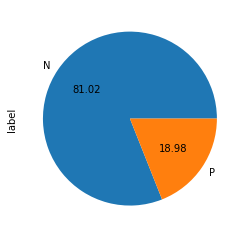

In [21]:
import matplotlib.pyplot as plt

df["label"].value_counts().plot.pie(autopct='%.2f',figsize=(4, 4))
plt.show()

In [22]:
df["label"].value_counts()

N    4231
P     991
Name: label, dtype: int64

In [23]:
df.to_json("AIMedFull_Ylhsieh.json")

## Split into train/test/validation

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


train_p, val_p = train_test_split(df,  test_size=.1,
                                                        random_state=777, stratify=df["label"])

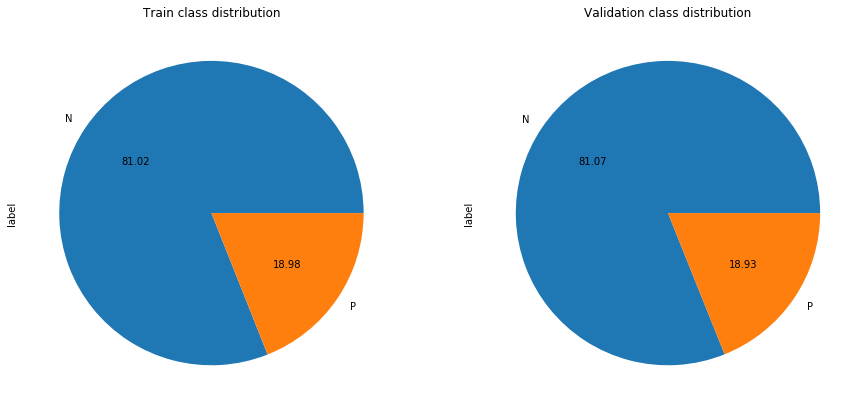

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(15,20))

ax[0].set_title('Train class distribution')
train_p.label.value_counts().plot.pie(autopct='%.2f',  ax=ax[0])

ax[1].set_title('Validation class distribution')
val_p.label.value_counts().plot.pie(autopct='%.2f',  ax=ax[1])



plt.show()

In [29]:
train_p.to_json("AIMedtrain_pubmedoverlap_Ylhsieh.json")
val_p.to_json("AIMedval_pubmedoverlap_Ylhsieh.json")

In [30]:
train_p.sample(n=30).to_json("AIMedtrain_sample_Ylhsieh.json")